# Data analysis of the RD2022 data set

In [1]:
import os
import glob
import zipfile
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np
from xml.etree import ElementTree
from xml.dom import minidom
import collections
import seaborn as sns
import pandas as pd
import json
%matplotlib inline

np.random.seed(42)

In [12]:
cwd = os.getcwd()
# os.chdir('..')
print(cwd)
base_path = cwd
data_folder_name = 'RDD2022'
data_folder_path = os.path.join(cwd, data_folder_name)
extension = ".zip"
dir_name = data_folder_path
print(data_folder_path)
print(dir_name)

c:\Users\tinus\V2023\TDT4265_project
c:\Users\tinus\V2023\TDT4265_project\RDD2022
c:\Users\tinus\V2023\TDT4265_project\RDD2022


#### Below we unzip the files in the RDD2022 datasat. It should do nothing if already unzipped 

In [13]:
# Code retrieved from https://stackoverflow.com/questions/31346790/unzip-all-zipped-files-in-a-folder-to-that-same-folder-using-python-2-7-5

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file
os.chdir(cwd)

#### Below we print the folder structure. Notice Chine_drone does not have a test set

In [4]:
# Function created using chatGPT
def print_folder_structure(path, indentation=''):
    """
    Prints the folder structure of a given path with indentation for each level, omitting files.
    
    Args:
    - path (str): The path of the folder structure to be printed.
    - indentation (str): The indentation string for each level. Default is an empty string.
    """
    # Check if path is a directory
    if os.path.isdir(path):
        # Print the current folder name
        print(indentation + os.path.basename(path) + '/')
        # Get the list of items in the folder
        items = os.listdir(path)
        # Sort the items alphabetically
        items.sort()
        # Recursively print the folder structure for each item
        for item in items:
            item_path = os.path.join(path, item)
            # Check if item is a directory
            if os.path.isdir(item_path):
                print_folder_structure(item_path, indentation + '  ')

# Example usage
path = data_folder_path  # Replace with the actual path of the folder structure
print_folder_structure(path)

RDD2022/
  China_Drone/
    train/
      annotations/
        xmls/
      images/
  China_MotorBike/
    test/
      images/
    train/
      annotations/
        xmls/
      images/
  Czech/
    test/
      images/
    train/
      annotations/
        xmls/
      images/
  India/
    test/
      images/
    train/
      annotations/
        xmls/
      images/
  Japan/
    test/
      images/
    train/
      annotations/
        xmls/
      images/
  Norway/
    test/
      images/
    train/
      annotations/
        xmls/
      images/
  United_States/
    test/
      images/
    train/
      annotations/
        xmls/
      images/


In [5]:
damage_types=["D00", "D10", "D20", "D40"]
# damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]
folder_names = os.listdir(data_folder_path)

In [6]:
# Code from https://www.youtube.com/watch?v=Ciy1J97dbY0
# Code fromhttps://github.com/sekilab/RoadDamageDetector/blob/master/RoadDamageDatasetTutorial.ipynb
# the number of total images and total labels.
cls_names = []
total_images = 0
cls_names_Norway = []
total_images_Norway = 0
for folder_name in folder_names:
    
    file_list = [filename for filename in os.listdir(os.path.join(data_folder_path, folder_name, 'train', 'Annotations', 'xmls')) if not filename.startswith('.')]
    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(os.path.join(data_folder_path, folder_name,'train', 'Annotations', 'xmls', file))
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
                if 'Norway' in folder_name:
                    cls_names_Norway.append(cls_name)
                    total_images_Norway += 1
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：38385
# of labels：65712


D00 : 26016
D10 : 11830
D20 : 10617
D40 : 6544


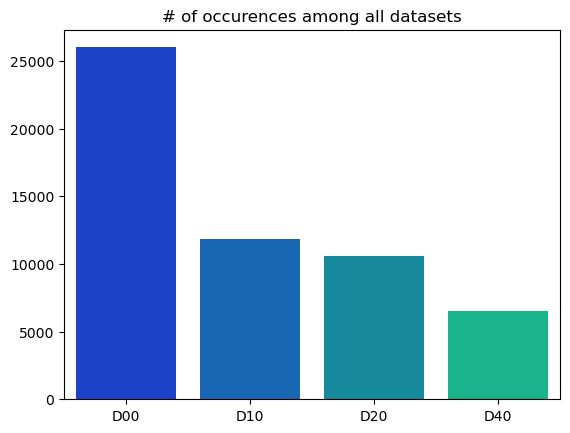

In [7]:
count_dict = collections.Counter(cls_names)
cls_count = []
for damage_type in damage_types:
    print(str(damage_type) + ' : ' + str(count_dict[damage_type]))
    cls_count.append(count_dict[damage_type])
    
sns.set_palette("winter", 4)
sns.barplot(x = damage_types, y = cls_count).set(title = '# of occurences among all datasets')
plt.show()

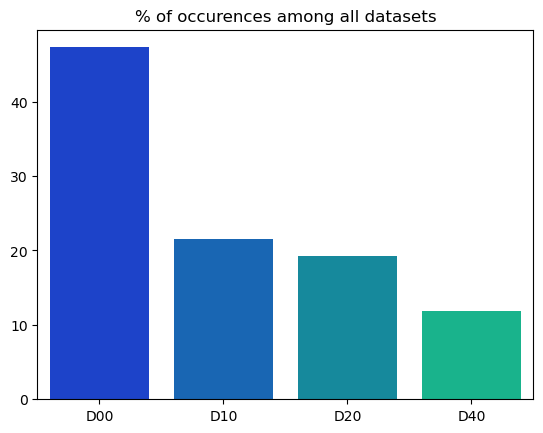

In [8]:
tot_count = sum(cls_count)
cls_count_percentage = [count/tot_count*100 for count in cls_count]
sns.set_palette("winter", 4)
sns.barplot(x = damage_types, y = cls_count_percentage).set(title = '% of occurences among all datasets')
plt.show()

#### We can see a significant inbalance in the dataset. Among the 38385 images there are 65712 labels found, and almost 50% of them are D00: Longtitudal. We check the Norwegian dataset to see if it is relatively similar to the dataset at an aggragated level (at all locations)

D00 : 8570
D10 : 1730
D20 : 468
D40 : 461


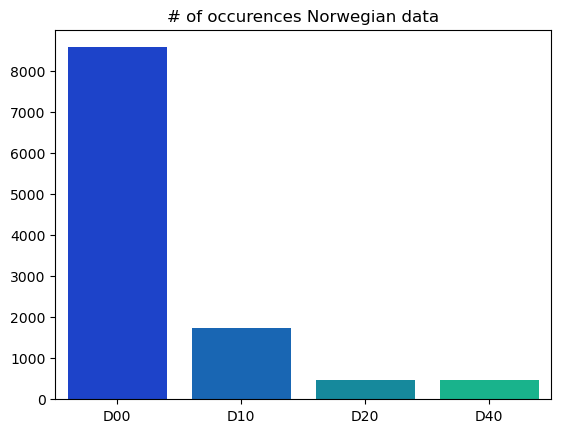

Counter({'D00': 8570, 'D10': 1730, 'D20': 468, 'D40': 461})


In [9]:
count_dict_Norway = collections.Counter(cls_names_Norway)
cls_count_Norway = []
for damage_type in damage_types:
    print(str(damage_type) + ' : ' + str(count_dict_Norway[damage_type]))
    cls_count_Norway.append(count_dict_Norway[damage_type])
    
sns.set_palette("winter", 4)
sns.barplot(x = damage_types, y = cls_count_Norway).set(title = '# of occurences Norwegian data')
plt.show()
print(count_dict_Norway)

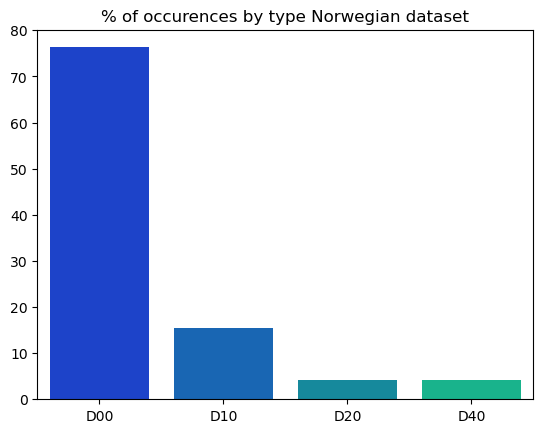

In [10]:
tot_count_Norway = sum(cls_count_Norway)
cls_count_percentage_Norway = [count/tot_count_Norway*100 for count in cls_count_Norway]
sns.set_palette("winter", 4)
sns.barplot(x = damage_types, y = cls_count_percentage_Norway).set(title = '% of occurences by type Norwegian dataset')
plt.show()

#### From the above plots, we can see that the Norwegian dataset is extremely unbalanced, and constitutes almost 80% logtitudal cracks. We therefore repeat the above analysis country by country, to see if maybe we should consider dropping some of the countries and only use datasets similar to the Norwegian one.

In [11]:
country_statistics = dict()
total_images_by_country = dict()
for folder_name in folder_names:
    cls_names = []
    total_images = 0
    file_list = [filename for filename in os.listdir(os.path.join(data_folder_path, folder_name, 'train', 'Annotations', 'xmls')) if not filename.startswith('.')]
    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(os.path.join(data_folder_path, folder_name,'train', 'Annotations', 'xmls', file))
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
    total_images_by_country[folder_name] = total_images
    count_dict = collections.Counter(cls_names)
    country_statistics[folder_name] = dict()
    for damage_type in damage_types:
        country_statistics[folder_name][damage_type] = count_dict[damage_type]
#     country_statistics[folder_name]['total_images'] = total_images

In [12]:
print(country_statistics)


{'China_Drone': {'D00': 1426, 'D10': 1263, 'D20': 293, 'D40': 86}, 'China_MotorBike': {'D00': 2678, 'D10': 1096, 'D20': 641, 'D40': 235}, 'Czech': {'D00': 988, 'D10': 399, 'D20': 161, 'D40': 197}, 'India': {'D00': 1555, 'D10': 68, 'D20': 2021, 'D40': 3187}, 'Japan': {'D00': 4049, 'D10': 3979, 'D20': 6199, 'D40': 2243}, 'Norway': {'D00': 8570, 'D10': 1730, 'D20': 468, 'D40': 461}, 'United_States': {'D00': 6750, 'D10': 3295, 'D20': 834, 'D40': 135}}


In [13]:
df = sns.load_dataset("penguins")
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [14]:
columns = ['Source', 'classification', 'num_classified']
pandas_dict = {key: [] for key in columns}
for key, value in country_statistics.items():
    for subkey, subvalue in value.items():
        pandas_dict['Source'].append(key)
        pandas_dict['classification'].append(subkey)
        pandas_dict['num_classified'].append(subvalue)
print(pandas_dict)

{'Source': ['China_Drone', 'China_Drone', 'China_Drone', 'China_Drone', 'China_MotorBike', 'China_MotorBike', 'China_MotorBike', 'China_MotorBike', 'Czech', 'Czech', 'Czech', 'Czech', 'India', 'India', 'India', 'India', 'Japan', 'Japan', 'Japan', 'Japan', 'Norway', 'Norway', 'Norway', 'Norway', 'United_States', 'United_States', 'United_States', 'United_States'], 'classification': ['D00', 'D10', 'D20', 'D40', 'D00', 'D10', 'D20', 'D40', 'D00', 'D10', 'D20', 'D40', 'D00', 'D10', 'D20', 'D40', 'D00', 'D10', 'D20', 'D40', 'D00', 'D10', 'D20', 'D40', 'D00', 'D10', 'D20', 'D40'], 'num_classified': [1426, 1263, 293, 86, 2678, 1096, 641, 235, 988, 399, 161, 197, 1555, 68, 2021, 3187, 4049, 3979, 6199, 2243, 8570, 1730, 468, 461, 6750, 3295, 834, 135]}


In [15]:
df = pd.DataFrame(pandas_dict)
print(df)

             Source classification  num_classified
0       China_Drone            D00            1426
1       China_Drone            D10            1263
2       China_Drone            D20             293
3       China_Drone            D40              86
4   China_MotorBike            D00            2678
5   China_MotorBike            D10            1096
6   China_MotorBike            D20             641
7   China_MotorBike            D40             235
8             Czech            D00             988
9             Czech            D10             399
10            Czech            D20             161
11            Czech            D40             197
12            India            D00            1555
13            India            D10              68
14            India            D20            2021
15            India            D40            3187
16            Japan            D00            4049
17            Japan            D10            3979
18            Japan            

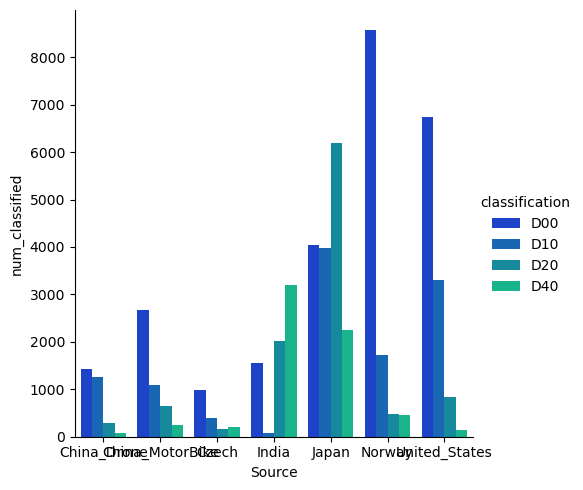

In [48]:
sns.catplot(x = 'Source', y = 'num_classified', hue = 'classification', data = df, kind = 'bar')

#### From the above plot we see that Norway is very domianted by longtitudal cracks. Maybe the United States dataset and the China Motor bike dataset are most suitable to use since they are also dominated by longtitudal cracks.

In [17]:
print(folder_names)

['China_Drone', 'China_MotorBike', 'Czech', 'India', 'Japan', 'Norway', 'United_States']


In [18]:
print(f'Number of images in selected datasets:')
print('Norway:', total_images_by_country['Norway'])
print('Unites States:', total_images_by_country['United_States'])
print('China MotorBike:', total_images_by_country['China_MotorBike'])
print(f"In Total: {total_images_by_country['Norway'] + total_images_by_country['United_States'] + total_images_by_country['China_MotorBike']}")

Number of images in selected datasets:
Norway: 8161
Unites States: 4805
China MotorBike: 1977
In Total: 14943


In [19]:
print(base_path)
print(os.path.join(base_path, 'visualization'))

C:\Users\tinus\V2023\TDT4265\TDT4265_2023\mini_project
C:\Users\tinus\V2023\TDT4265\TDT4265_2023\mini_project\visualization


In [20]:
# Code from: https://piyush-kulkarni.medium.com/visualize-the-xml-annotations-in-python-c9696ba9c188
import os
import cv2
import  xml.dom.minidom
folder = 'United_States'
 
image_path=os.path.join(data_folder_path, folder, 'train', 'images')
annotation_path=os.path.join(data_folder_path, folder, 'train', 'annotations', 'xmls')
 
files_name = os.listdir(image_path)
# print(files_name)
for filename_ in files_name[:30:]:
    filename, extension= os.path.splitext(filename_)
    img_path =os.path.join(image_path, filename + '.jpg')
    xml_path =os.path.join(annotation_path, filename + '.xml')
    img = cv2.imread(img_path)
    if img is None:
        pass
    dom = xml.dom.minidom.parse(xml_path)
    root = dom.documentElement
    objects=dom.getElementsByTagName("object")
    i=0
    for object in objects:  
        bndbox = root.getElementsByTagName('bndbox')[i]
        xmin = bndbox.getElementsByTagName('xmin')[0]
        ymin = bndbox.getElementsByTagName('ymin')[0]
        xmax = bndbox.getElementsByTagName('xmax')[0]
        ymax = bndbox.getElementsByTagName('ymax')[0]
        xmin_data=xmin.childNodes[0].data
        ymin_data=ymin.childNodes[0].data
        xmax_data=xmax.childNodes[0].data
        ymax_data=ymax.childNodes[0].data
        obj_name = obj.find('name').text
        i= i +1 
        cv2.rectangle(img,(int(float(xmin_data)),int(float(ymin_data)),int(float(xmax_data)),int(float(ymax_data))),(55,255,155),5)
    flag=0
    flag=cv2.imwrite(os.path.join(base_path, 'visualization', "{}.jpg".format(filename)),img)
    if(flag):
        print(filename,"done")
print("all done ====================================")

United_States_000000 done
United_States_000001 done
United_States_000002 done
United_States_000003 done
United_States_000004 done
United_States_000005 done
United_States_000006 done
United_States_000007 done
United_States_000008 done
United_States_000009 done
United_States_000010 done
United_States_000011 done
United_States_000012 done
United_States_000013 done
United_States_000014 done
United_States_000015 done
United_States_000016 done
United_States_000017 done
United_States_000018 done
United_States_000019 done
United_States_000020 done
United_States_000021 done
United_States_000022 done
United_States_000023 done
United_States_000024 done
United_States_000025 done
United_States_000026 done
United_States_000027 done
United_States_000028 done
United_States_000029 done
all done ====================================


In [21]:

def draw_boxes_on_image(image, xmin, ymin, xmax, ymax, label, color):
    # Function to draw boundary boxes on the image
    cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), color, 5)
    cv2.putText(image, label, (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

def save_modified_images_with_boxes(image_folder, annotation_folder, saved_folder):
    # Function to save modified images with boundary boxes
    
    # Get the list of image files
    image_files = os.listdir(image_folder)
    
    # Define a color mapping for different labels
    color_mapping = {
        'D00': (0, 255, 0),  # Green
        'D10': (0, 0, 255),  # Blue
        'D20': (255, 0, 0),  # Red
        'D40': (255, 255, 0)  # Yellow
    }

    # Loop through each image file
    for image_file in image_files[:30:]:
        # Extract the filename without extension
        filename, extension = os.path.splitext(image_file)

        # Check if corresponding XML annotation file exists
        xml_file = os.path.join(annotation_folder, filename + '.xml')
        if not os.path.exists(xml_file):
            print(f"Annotation file not found for image '{image_file}', skipping...")
            continue

        # Load the image
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image '{image_file}', skipping...")
            continue

        # Parse the XML annotation file
        dom = xml.dom.minidom.parse(xml_file)
        root = dom.documentElement
        objects = dom.getElementsByTagName("object")

        # Loop through each object in the annotation
        for obj in objects:
            xmin = float(obj.getElementsByTagName('xmin')[0].childNodes[0].data)
            ymin = float(obj.getElementsByTagName('ymin')[0].childNodes[0].data)
            xmax = float(obj.getElementsByTagName('xmax')[0].childNodes[0].data)
            ymax = float(obj.getElementsByTagName('ymax')[0].childNodes[0].data)
            label = obj.getElementsByTagName('name')[0].childNodes[0].data

            # Get the color for the label from the color mapping
            color = color_mapping.get(label, (255, 255, 255))  # Default color is white

            # Draw the boundary box and label on the image
            draw_boxes_on_image(image, xmin, ymin, xmax, ymax, label, color)


        # Save the modified image with boundary boxes
        saved_path = os.path.join(saved_folder, filename + '_saved.jpg')
        cv2.imwrite(saved_path, image)
#         print(f"Saved modified image with boundary boxes: '{saved_path}'")

In [22]:
image_path=os.path.join(data_folder_path, folder, 'train', 'images')
annotation_path=os.path.join(data_folder_path, folder, 'train', 'annotations', 'xmls')
save_path = os.path.join(base_path, 'visualization', folder)
if not os.path.exists(save_path):
    os.makedirs(save_path)

save_modified_images_with_boxes(image_path, annotation_path, save_path)

In [23]:
def draw_boxes_on_image(image, xmin, ymin, xmax, ymax, label, color):
    # Function to draw boundary boxes and labels on the image
    cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), color, 5)
    cv2.putText(image, label, (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

def display_modified_images_with_boxes(image_folder, annotation_folder):
    # Function to display modified images with boundary boxes and labels

    # Define a color mapping for different labels
    color_mapping = {
        'D00': (0, 255, 0),  # Green
        'D10': (0, 0, 255),  # Blue
        'D20': (255, 0, 0),  # Red
        'D40': (255, 255, 0)  # Yellow
    }

    # Get the list of image files
    image_files = os.listdir(image_folder)

    # Loop through each image file
    for image_file in image_files[:30:]:
        # Extract the filename without extension
        filename, extension = os.path.splitext(image_file)

        # Check if corresponding XML annotation file exists
        xml_file = os.path.join(annotation_folder, filename + '.xml')
        if not os.path.exists(xml_file):
            print(f"Annotation file not found for image '{image_file}', skipping...")
            continue

        # Load the image
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image '{image_file}', skipping...")
            continue

        # Parse the XML annotation file
        dom = xml.dom.minidom.parse(xml_file)
        root = dom.documentElement
        objects = dom.getElementsByTagName("object")

        # Loop through each object in the annotation
        for obj in objects:
            xmin = float(obj.getElementsByTagName('xmin')[0].childNodes[0].data)
            ymin = float(obj.getElementsByTagName('ymin')[0].childNodes[0].data)
            xmax = float(obj.getElementsByTagName('xmax')[0].childNodes[0].data)
            ymax = float(obj.getElementsByTagName('ymax')[0].childNodes[0].data)
            label = obj.getElementsByTagName('name')[0].childNodes[0].data

            # Get the color for the label from the color mapping
            color = color_mapping.get(label, (255, 255, 255))  # Default color is white

            # Draw the boundary box and label on the image
            draw_boxes_on_image(image, xmin, ymin, xmax, ymax, label, color)

        # Display the modified image with boundary boxes in a Jupyter Notebook
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()


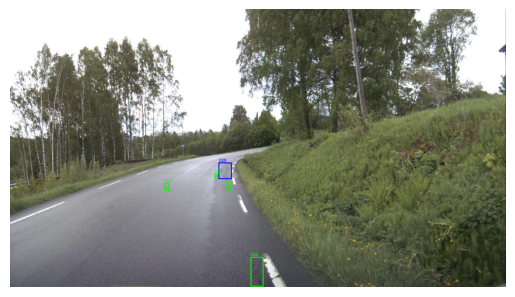

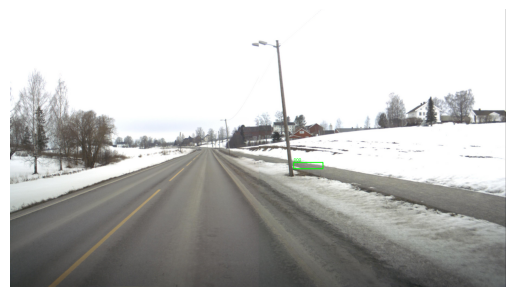

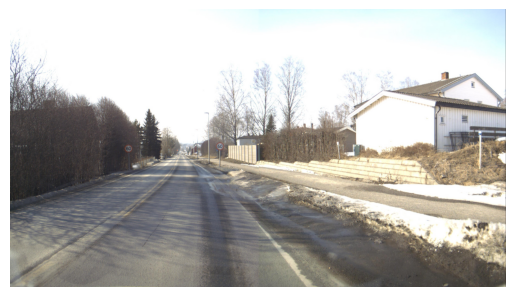

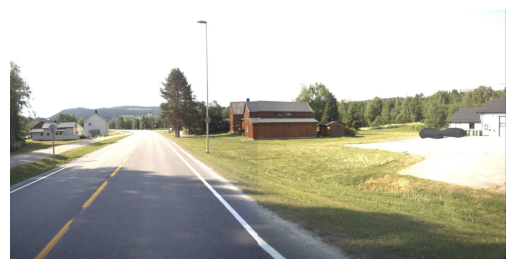

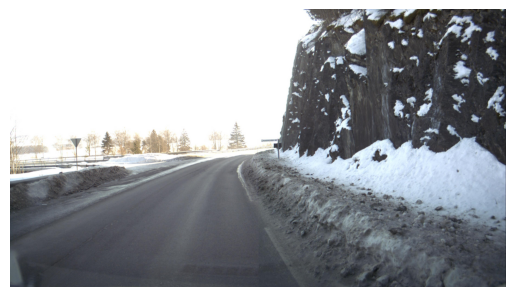

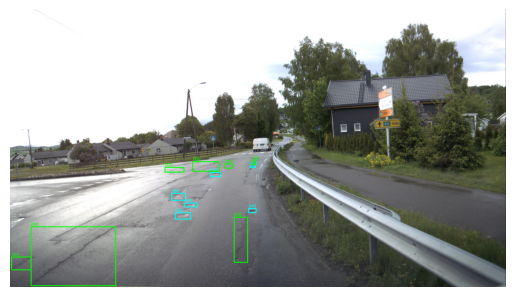

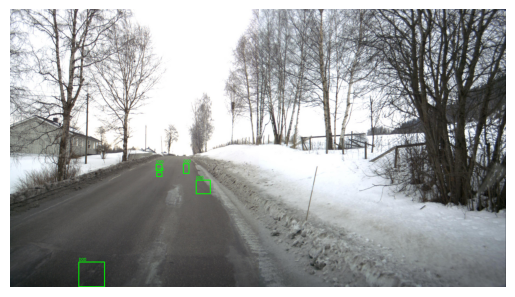

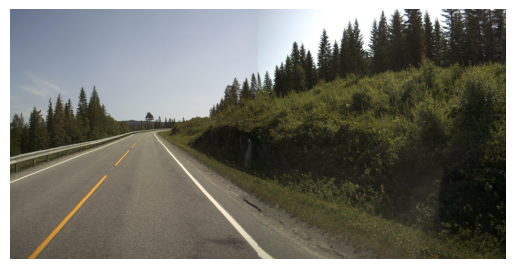

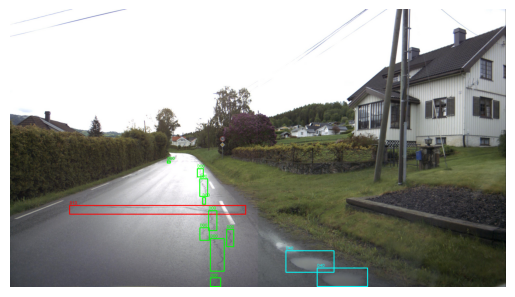

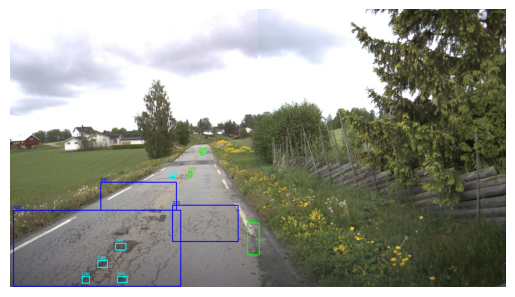

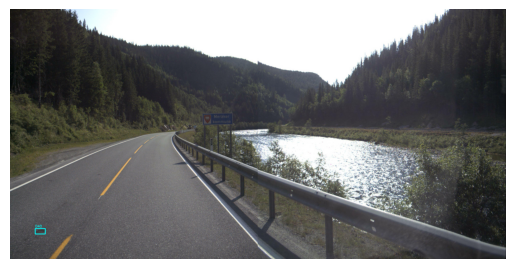

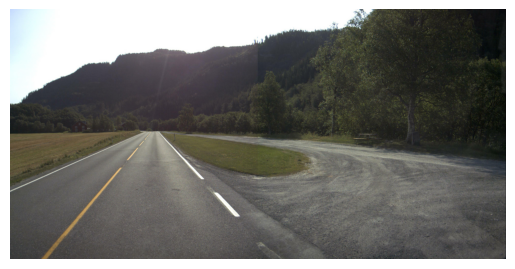

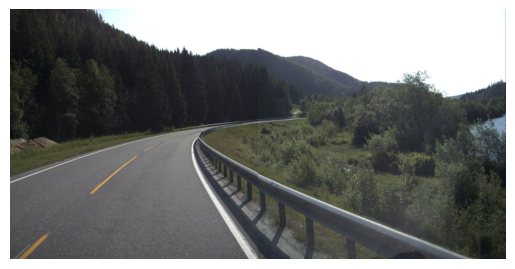

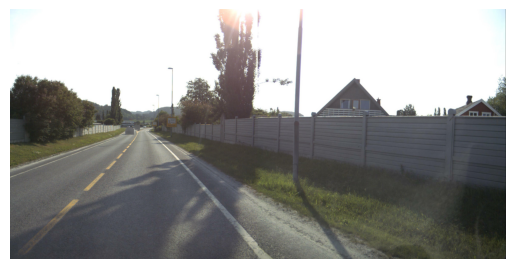

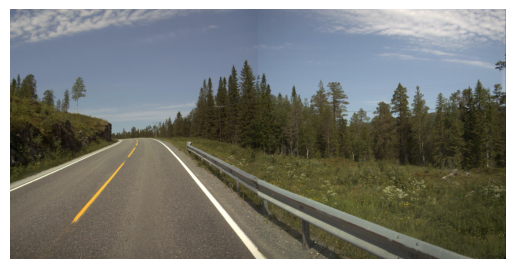

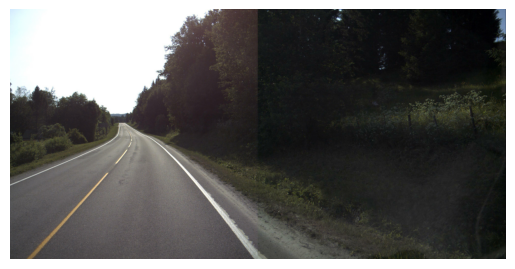

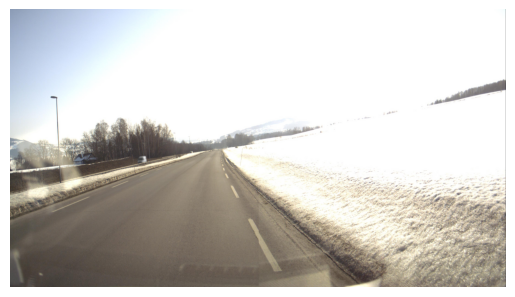

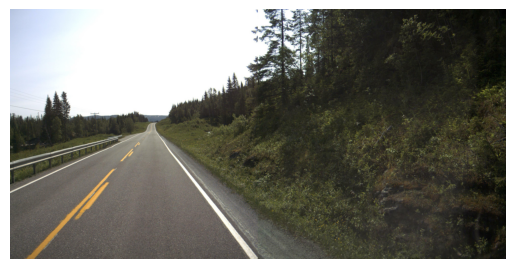

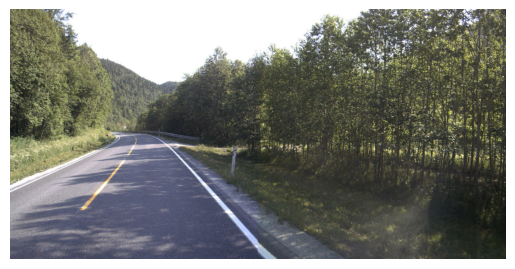

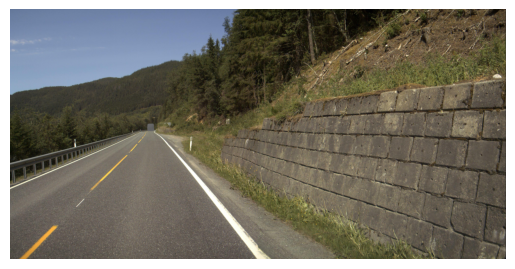

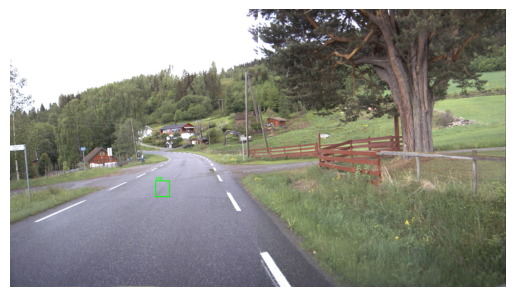

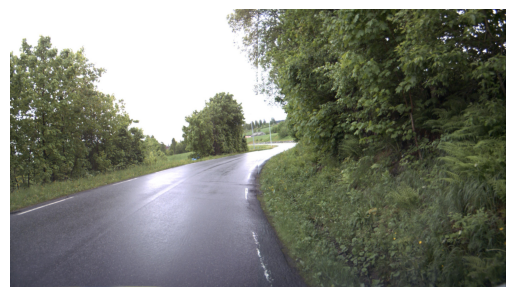

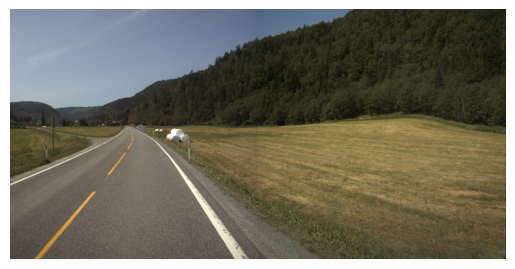

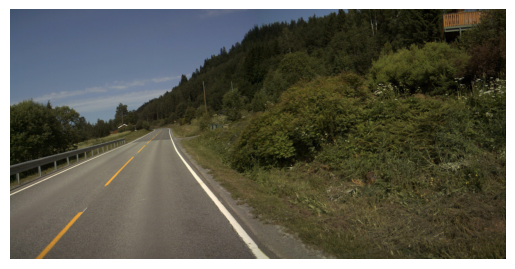

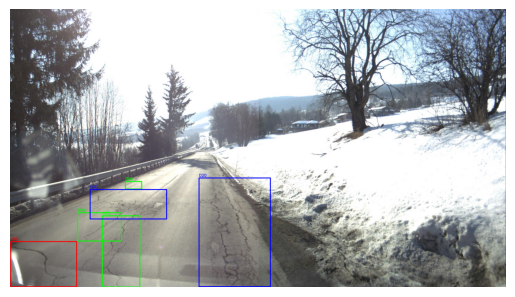

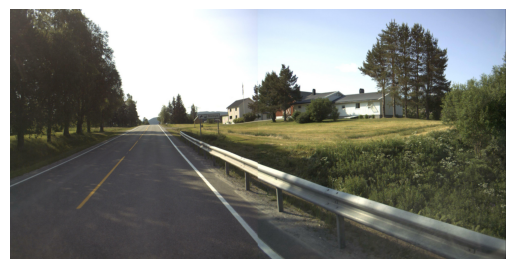

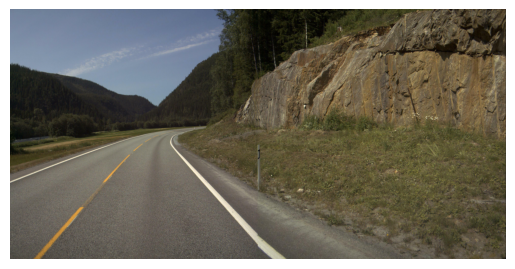

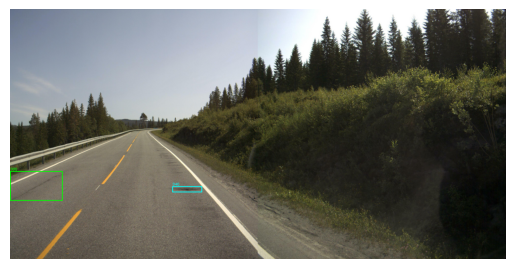

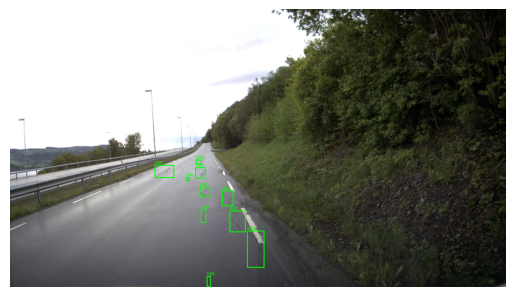

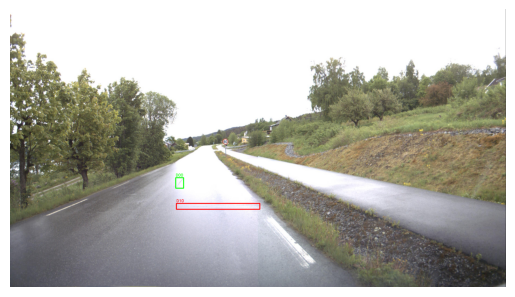

In [66]:
folder = 'Norway'
 
image_path=os.path.join(data_folder_path, folder, 'train', 'images')
annotation_path=os.path.join(data_folder_path, folder, 'train', 'annotations', 'xmls')
display_modified_images_with_boxes(image_path, annotation_path)

In [25]:
def get_image_sizes(image_folder, image_filter=".jpg"):
    """
    Get sizes (width, height) of all images in the given folder that match the specified filter.
    
    Args:
        image_folder (str): The path to the image folder.
        image_filter (str): The image file extension filter. Defaults to ".jpg".
    
    Returns:
        list: A list of (width, height) tuples for all the images in the folder.
    """
    image_sizes = []
    image_files = [f for f in os.listdir(image_folder) if f.endswith(image_filter)]
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            height, width, _ = image.shape
            if _ != 3:
                print(_)
            image_sizes.append((width, height))
    return image_sizes

In [26]:
# norway = get_image_sizes(image_path)

In [27]:
sizes_dict = dict()
image_paths = [os.path.join(data_folder_path, folder, 'train', 'images') for folder in folder_names]
# print(image_paths)

In [28]:
# for idx, path in enumerate(image_paths):
#     sizes_dict[folder_names[idx]] = get_image_sizes(path)
with open('image_sizes.json') as json_file:
    sizes_dict = json.load(json_file)


In [29]:
# with open("image_sizes.json", "w") as outfile:
#     json.dump(sizes_dict, outfile)

In [30]:
for key, value in sizes_dict.items():
    print('For dataset', key)
    unique = []
    for item in value:
        if item not in unique:
            unique.append(item)
    for size in unique:
        print(f"Size {size} occurs: {value.count(size)} times")
    print('')

For dataset China_Drone
Size [512, 512] occurs: 2401 times

For dataset China_MotorBike
Size [512, 512] occurs: 1977 times

For dataset Czech
Size [600, 600] occurs: 2829 times

For dataset India
Size [720, 720] occurs: 7706 times

For dataset Japan
Size [600, 600] occurs: 10187 times
Size [1080, 1080] occurs: 48 times
Size [1024, 1024] occurs: 147 times
Size [540, 540] occurs: 124 times

For dataset Norway
Size [3650, 2044] occurs: 923 times
Size [3643, 2041] occurs: 2896 times
Size [4040, 2035] occurs: 4342 times

For dataset United_States
Size [640, 640] occurs: 4805 times



In [49]:
print(data_folder_path)

C:\Users\tinus\V2023\TDT4265\TDT4265_2023\mini_project\RDD2022


In [54]:
norway_test_set_image_path = os.path.join(data_folder_path, 'Norway', 'test', 'images')
norway_test_set_image_sizes = {}
norway_test_set_image_sizes['norway'] = get_image_sizes(norway_test_set_image_path)
# with open('Norway_test_set_sizes.json') as json_file:
#     norway_test_set_image_sizes = json.load(json_file)

In [55]:
# with open("Norway_test_set_sizes.json", "w") as outfile:
#     json.dump(norway_test_set_image_sizes, outfile)

In [56]:
l = norway_test_set_image_sizes['norway']
print(f'Norway test dataset contains shape {l[0]} occuring {l.count(l[0])}')

Norway test dataset contains shape (3650, 2044) occuring 223


In [57]:
for pair in set(l):
    print(pair, 'occurs', l.count(pair), 'times')

(3643, 2041) occurs 759 times
(4040, 2035) occurs 1058 times
(3650, 2044) occurs 223 times


In [35]:
for w, y in [[2650,2044], [2642, 2041], [4040, 2035]]:
    print(w, y)
    print('width', w/640, 'height', y/640)

2650 2044
width 4.140625 height 3.19375
2642 2041
width 4.128125 height 3.1890625
4040 2035
width 6.3125 height 3.1796875


In [36]:
# test_set_path = os.path.join(data_folder_path, 'test_set')
# test_set_images_path = os.path.join(test_set_path, 'images')
# test_set_labels_path = os.path.join(test_set_path, 'annotations', 'xmls')

# if not os.path.exists(test_set_images_path):
#     os.makedirs(test_set_images_path)

# if not os.path.exists(test_set_labels_path):
#     os.makedirs(test_set_labels_path)

In [37]:
# test_set_path = os.path.join(data_folder_path, 'test_set_augmented')
# test_set_images_path = os.path.join(test_set_path, 'images')
# test_set_labels_path = os.path.join(test_set_path, 'annotations', 'xmls')

# if not os.path.exists(test_set_images_path):
#     os.makedirs(test_set_images_path)

# if not os.path.exists(test_set_labels_path):
#     os.makedirs(test_set_labels_path)